In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer
import seaborn as sns

In [2]:
data = pd.read_csv('clustering_data_2000.csv')
data.head()

,country,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
0,Canada,0.091975,3.933278,3.211946,0.722937,3.567601,1.280648,527.608562,3.562414,2.728782,4.472900,2.952957,15.259953,1.381896,2.436681
1,Mexico,0.063846,3.817485,1.292879,0.082210,0.330749,0.274273,353.845999,2.472937,2.648448,1.800441,0.335801,1.414735,0.295957,1.634185
2,US,0.868178,38.353691,22.622064,7.935715,2.727614,22.631530,5740.774377,33.626782,26.608555,31.503089,32.414766,11.667016,24.420776,26.512908
3,Argentina,0.007098,0.871116,1.162682,0.061770,0.340340,0.027046,124.776396,0.274927,0.604352,1.619131,0.252310,1.455761,0.029184,0.576261
4,Brazil,0.322243,3.721664,0.349362,0.060460,3.044030,0.544253,301.711950,12.481291,2.581971,0.486516,0.246959,13.020447,0.587282,1.393412


In [3]:
data.isna().sum()

country              0
renewable            1
oil                  1
gas                  1
nuclear              1
hydroelec            1
coal                 1
co2_emission         1
renewable_percent    1
oil_percent          1
gas_percent          1
nuclear_percent      1
hydroelec_percent    1
coal_percent         1
co2_percent          1
dtype: int64

In [4]:
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()
print(data[data["renewable"].isnull()][null_columns])

    renewable  oil  gas  nuclear  hydroelec  coal  co2_emission  \
49        NaN  NaN  NaN      NaN        NaN   NaN           NaN   

    renewable_percent  oil_percent  gas_percent  nuclear_percent  \
49                NaN          NaN          NaN              NaN   

    hydroelec_percent  coal_percent  co2_percent  
49                NaN           NaN          NaN  


In [5]:
data.loc[[49]]

,country,renewable,oil,gas,nuclear,hydroelec,coal,co2_emission,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
49,USSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data = data.drop([49])

In [7]:
selected_data = data.iloc[:, [0, 8, 9, 10, 11, 12, 13, 14]]
selected_data

,country,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
0,Canada,3.562414,2.728782,4.472900,2.952957,15.259953,1.381896,2.436681
1,Mexico,2.472937,2.648448,1.800441,0.335801,1.414735,0.295957,1.634185
2,US,33.626782,26.608555,31.503089,32.414766,11.667016,24.420776,26.512908
3,Argentina,0.274927,0.604352,1.619131,0.252310,1.455761,0.029184,0.576261
4,Brazil,12.481291,2.581971,0.486516,0.246959,13.020447,0.587282,1.393412
...,...,...,...,...,...,...,...,...
77,South Korea,0.039108,3.136278,0.993021,4.450808,0.171503,1.939251,2.035094
78,Sri Lanka,0.001484,0.101797,0.000000,0.000000,0.137056,0.000015,0.048804
79,Taiwan,0.410423,1.318708,0.339270,1.572711,0.195047,1.242199,1.088724
80,Thailand,0.204081,1.051843,1.062587,0.000000,0.251999,0.356203,0.783853


In [8]:
selected_data.describe()

,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,1.234568,1.234568,1.234568,1.234568,1.234568,1.234568,1.234568
std,4.078217,3.158859,3.591824,4.340073,2.787846,4.501931,3.433796
min,0.000000,0.023973,0.000000,0.000000,0.000000,0.000000,0.012844
25%,0.000000,0.195655,0.098270,0.000000,0.032038,0.006226,0.150094
50%,0.094895,0.370354,0.384415,0.000000,0.271634,0.122124,0.293999
75%,0.646656,1.051843,1.062587,0.531415,1.045174,0.565523,1.088724
max,33.626782,26.608555,31.503089,32.414766,15.259953,31.898156,26.512908


In [9]:
list(selected_data['country'])

['Canada',
 'Mexico',
 'US',
 'Argentina',
 'Brazil',
 'Chile',
 'Colombia',
 'Ecuador',
 'Peru',
 'Trinidad & Tobago',
 'Venezuela',
 'Central America',
 'Belarus',
 'Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Netherlands',
 'North Macedonia',
 'Norway',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'Ukraine',
 'United Kingdom',
 'Azerbaijan',
 'Kazakhstan',
 'Turkmenistan',
 'Uzbekistan',
 'Iran',
 'Iraq',
 'Israel',
 'Kuwait',
 'Oman',
 'Qatar',
 'Saudi Arabia',
 'United Arab Emirates',
 'Algeria',
 'Egypt',
 'Morocco',
 'South Africa',
 'Eastern Africa',
 'Middle Africa',
 'Western Africa',
 'Australia',
 'Bangladesh',
 'China',
 'India',
 'Indonesia',
 'Japan',
 'Malaysia',
 'New Zealand',
 'Pakistan',
 'Philippines',
 'Singapor

In [10]:
# removed_values = selected_data[(selected_data['renewable_percent'] >= 4) & (selected_data['oil_percent'] >= 4) & (selected_data['gas_percent'] >= 4)&(selected_data['nuclear_percent'] >= 4)&
#               (selected_data['hydroelec_percent'] >= 4)& (selected_data['coal_percent'] >= 4) & (selected_data['co2_percent'])]

In [11]:
# removed_values

In [12]:
desired_values = selected_data[(selected_data['renewable_percent'] < 4) & (selected_data['oil_percent']<4) & (selected_data['gas_percent'] < 4)&(selected_data['nuclear_percent'] < 4)&
              (selected_data['hydroelec_percent'] < 4)& (selected_data['coal_percent'] < 4) & (selected_data['co2_percent'])]

In [13]:
 desired_values.describe()

,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,0.395218,0.543123,0.647906,0.263933,0.477423,0.313803,0.480830
std,0.749395,0.617233,0.839170,0.639454,0.668657,0.622535,0.501543
min,0.000000,0.023973,0.000000,0.000000,0.000000,0.000000,0.012844
25%,0.000000,0.132774,0.077405,0.000000,0.014513,0.004956,0.124229
50%,0.027113,0.330104,0.339270,0.000000,0.195047,0.091621,0.266651
75%,0.358935,0.652739,0.887173,0.160087,0.639765,0.284329,0.576261
max,3.356846,2.786295,3.719797,3.159123,3.361329,3.371712,1.989515


In [14]:
list(desired_values['country'])

['Mexico',
 'Argentina',
 'Chile',
 'Colombia',
 'Ecuador',
 'Peru',
 'Trinidad & Tobago',
 'Venezuela',
 'Central America',
 'Belarus',
 'Austria',
 'Belgium',
 'Bulgaria',
 'Croatia',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Estonia',
 'Finland',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Italy',
 'Latvia',
 'Lithuania',
 'Luxembourg',
 'Netherlands',
 'North Macedonia',
 'Poland',
 'Portugal',
 'Romania',
 'Slovakia',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'Ukraine',
 'Azerbaijan',
 'Kazakhstan',
 'Turkmenistan',
 'Uzbekistan',
 'Iran',
 'Iraq',
 'Israel',
 'Kuwait',
 'Oman',
 'Qatar',
 'Saudi Arabia',
 'United Arab Emirates',
 'Algeria',
 'Egypt',
 'Morocco',
 'South Africa',
 'Eastern Africa',
 'Middle Africa',
 'Western Africa',
 'Australia',
 'Bangladesh',
 'Indonesia',
 'Malaysia',
 'New Zealand',
 'Pakistan',
 'Singapore',
 'Sri Lanka',
 'Taiwan',
 'Thailand',
 'Vietnam']

In [15]:
removed_countries = selected_data[~selected_data.country.isin(desired_values['country'])]
removed_countries

,country,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
0,Canada,3.562414,2.728782,4.472900,2.952957,15.259953,1.381896,2.436681
2,US,33.626782,26.608555,31.503089,32.414766,11.667016,24.420776,26.512908
4,Brazil,12.481291,2.581971,0.486516,0.246959,13.020447,0.587282,1.393412
22,France,1.691451,2.844680,2.085349,16.957991,2.838592,0.640034,1.761895
23,Germany,5.898558,3.922261,4.157256,6.927843,1.063643,3.853911,3.946030
34,Norway,0.112905,0.265540,0.212404,0.000000,6.066082,0.044848,0.156771
45,United Kingdom,1.870318,2.384604,5.080561,3.474532,0.217536,1.659305,2.615645
68,China,1.219650,6.646360,1.238071,0.683651,9.513302,31.898156,15.521671
69,India,1.308682,3.180701,1.271507,0.644088,3.293164,7.426575,4.429128
71,Japan,6.415719,7.728742,3.793312,13.035058,3.613010,4.314267,5.704774


In [16]:
# removed_countries.to_csv('excluded_equal_greaterthan_4percent_2000.csv', index=False)

In [17]:
 desired_values = desired_values.reset_index()

In [18]:
 desired_values.isnull().sum()

index                0
country              0
renewable_percent    0
oil_percent          0
gas_percent          0
nuclear_percent      0
hydroelec_percent    0
coal_percent         0
co2_percent          0
dtype: int64

In [19]:
desired_values

,index,country,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent
0,1,Mexico,2.472937,2.648448,1.800441,0.335801,1.414735,0.295957,1.634185
1,3,Argentina,0.274927,0.604352,1.619131,0.252310,1.455761,0.029184,0.576261
2,5,Chile,0.532573,0.355576,0.351635,0.000000,0.816165,0.145144,0.260262
3,6,Colombia,0.192824,0.330104,0.287553,0.000000,1.318103,0.122124,0.253643
4,7,Ecuador,0.000000,0.195655,0.016384,0.000000,0.325561,0.000000,0.093592
...,...,...,...,...,...,...,...,...,...
64,76,Singapore,0.094895,1.063108,0.083092,0.000000,0.000000,0.000000,0.494608
65,78,Sri Lanka,0.001484,0.101797,0.000000,0.000000,0.137056,0.000015,0.048804
66,79,Taiwan,0.410423,1.318708,0.339270,1.572711,0.195047,1.242199,1.088724
67,80,Thailand,0.204081,1.051843,1.062587,0.000000,0.251999,0.356203,0.783853


In [20]:
features = desired_values.iloc[:,[2,3,4,5,6,7]]
features

,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent
0,2.472937,2.648448,1.800441,0.335801,1.414735,0.295957
1,0.274927,0.604352,1.619131,0.252310,1.455761,0.029184
2,0.532573,0.355576,0.351635,0.000000,0.816165,0.145144
3,0.192824,0.330104,0.287553,0.000000,1.318103,0.122124
4,0.000000,0.195655,0.016384,0.000000,0.325561,0.000000
...,...,...,...,...,...,...
64,0.094895,1.063108,0.083092,0.000000,0.000000,0.000000
65,0.001484,0.101797,0.000000,0.000000,0.137056,0.000015
66,0.410423,1.318708,0.339270,1.572711,0.195047,1.242199
67,0.204081,1.051843,1.062587,0.000000,0.251999,0.356203


In [21]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    Sum_of_squared_distances.append(km.inertia_)

C:\Users\User\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


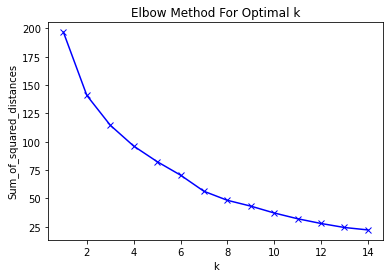

In [22]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [60]:
# Use n_clusters=5 as the k value

kmeans = KMeans(n_clusters=4, init='k-means++', n_init= 20, max_iter=600, algorithm = 'elkan')

In [61]:
# Fit the model to the data
model = kmeans.fit(features)

centroids = model.cluster_centers_
print(centroids)


[[0.19287423 0.31873629 0.38432154 0.08821563 0.41509556 0.13070755]
 [0.22159432 0.83966418 1.08429341 1.20505067 0.25641045 1.92314504]
 [1.15220823 1.81137504 2.38649134 0.07084104 0.5932914  0.27110366]
 [2.55090485 0.95495136 0.37508741 1.93657574 1.75019751 0.42944533]]


In [62]:
# Predict the clusters
predicted_clusters = kmeans.predict(features)

In [63]:
predicted_clusters

array([2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0,
       1, 0, 0])

In [64]:
len(predicted_clusters)

69

In [65]:
labels = pd.DataFrame(model.labels_)

labeleddata = pd.concat((desired_values,labels),axis=1, join='inner')

labeleddata = labeleddata.rename({0:'labels'},axis=1)

labeleddata



,index,country,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent,labels
0,1,Mexico,2.472937,2.648448,1.800441,0.335801,1.414735,0.295957,1.634185,2
1,3,Argentina,0.274927,0.604352,1.619131,0.252310,1.455761,0.029184,0.576261,0
2,5,Chile,0.532573,0.355576,0.351635,0.000000,0.816165,0.145144,0.260262,0
3,6,Colombia,0.192824,0.330104,0.287553,0.000000,1.318103,0.122124,0.253643,0
4,7,Ecuador,0.000000,0.195655,0.016384,0.000000,0.325561,0.000000,0.093592,0
...,...,...,...,...,...,...,...,...,...,...
64,76,Singapore,0.094895,1.063108,0.083092,0.000000,0.000000,0.000000,0.494608,0
65,78,Sri Lanka,0.001484,0.101797,0.000000,0.000000,0.137056,0.000015,0.048804,0
66,79,Taiwan,0.410423,1.318708,0.339270,1.572711,0.195047,1.242199,1.088724,1
67,80,Thailand,0.204081,1.051843,1.062587,0.000000,0.251999,0.356203,0.783853,0


In [66]:
labels

,0
0,2
1,0
2,0
3,0
4,0
...,...
64,0
65,0
66,1
67,0


In [67]:
label_series = pd.Series(predicted_clusters)
labels_combine = pd.concat([labels, label_series], axis=1 )

In [68]:

labels_combine

,0,0
0,2,2
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
64,0,0
65,0,0
66,1,1
67,0,0


In [69]:
len(labels)

69

In [70]:
len(labeleddata)

69

In [71]:
labeleddata.to_csv('multivariate__labeled_2000.csv', index=False)

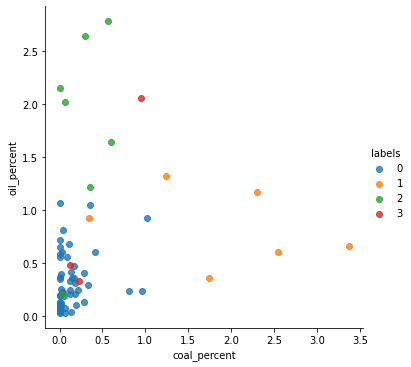

In [72]:
sns.lmplot(x='coal_percent',y='oil_percent',data=labeleddata,hue='labels',fit_reg=False)

In [73]:
labeleddata['Constant'] = "Data"
#This is just to add something constant for the strip/swarm plots' X axis. Can be anything you want it to be.

<AxesSubplot:xlabel='Constant', ylabel='coal_percent'>

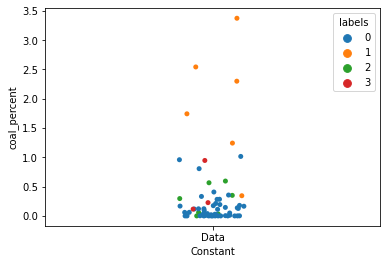

In [74]:
sns.stripplot(x=labeleddata['Constant'],y=labeleddata['coal_percent'],hue=labeleddata['labels'],jitter=True)

<AxesSubplot:xlabel='Constant', ylabel='coal_percent'>

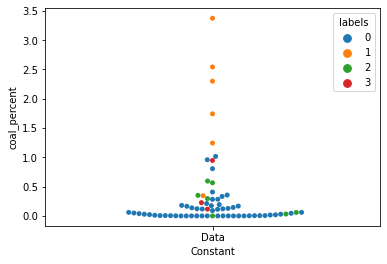

In [75]:
sns.swarmplot(x=labeleddata['Constant'],y=labeleddata['coal_percent'],hue=labeleddata['labels'])

In [76]:
labeleddata.to_csv('diff_labeling_method_2000.csv', index=False)

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
ccinfo_pca = pca.fit_transform(features)
pca.explained_variance_ratio_
pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1]
# Create the PCA DataFrame
ccinfo_pca_df = pd.DataFrame(
    ccinfo_pca,
    columns=["PCA1", "PCA2"]
)

In [78]:
# Review the PCA DataFrame
ccinfo_pca_df.head()

,PCA1,PCA2
0,2.961065,0.544624
1,0.809783,-0.213997
2,-0.189979,0.414861
3,-0.239834,0.512514
4,-0.897562,0.151383


In [79]:
# kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=600, algorithm = 'auto')
# model = kmeans.fit(ccinfo_pca_df)
# labels = kmeans.predict(ccinfo_pca_df)

In [43]:
# ccinfo_pca_df["labels"] = labels

In [44]:
# labels

In [45]:
# conda install hvplot -y

In [46]:
# !conda install -c pyviz hvplot -y

In [47]:
# # Plot the clusters
# import hvplot.pandas
# ccinfo_pca_df.hvplot.scatter(
#     x="PCA1",
#     y="PCA2",
#     by="labels"
# )
# plt.show()

## PCA

In [80]:
kmeans = KMeans(n_clusters=4, init='k-means++', n_init= 20, max_iter=600, algorithm = 'elkan')
model = kmeans.fit(ccinfo_pca_df)
pca_labels = kmeans.predict(ccinfo_pca_df)

In [81]:
ccinfo_pca_df["pca_labels"] = pca_labels

In [82]:
pca_labels

array([2, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 2, 2, 0, 3, 1, 0, 0, 0, 3, 1,
       0, 0, 0, 0, 0, 1, 3, 0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0,
       3, 3, 0])

In [83]:
# Plot the clusters
import hvplot.pandas
ccinfo_pca_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    by="pca_labels"
)

:NdOverlay   [pca_labels]
   :Scatter   [PCA1]   (PCA2)

In [84]:
pca_series = pd.Series(pca_labels)

# pca_series.reset_index(drop=True, inplace=True)
# desired_values.reset_index(drop=True, inplace=True)

pca_2000 = pd.concat([desired_values, pca_series], axis=1) 


# pca_2000 = pd.concat([desired_values, pca_series], axis=1, join='inner', ignore_index=True)
# pca_2000.reset_index(drop=True, inplace=True)

pca_2000

,index,country,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent,0
0,1,Mexico,2.472937,2.648448,1.800441,0.335801,1.414735,0.295957,1.634185,2
1,3,Argentina,0.274927,0.604352,1.619131,0.252310,1.455761,0.029184,0.576261,3
2,5,Chile,0.532573,0.355576,0.351635,0.000000,0.816165,0.145144,0.260262,0
3,6,Colombia,0.192824,0.330104,0.287553,0.000000,1.318103,0.122124,0.253643,0
4,7,Ecuador,0.000000,0.195655,0.016384,0.000000,0.325561,0.000000,0.093592,0
...,...,...,...,...,...,...,...,...,...,...
64,76,Singapore,0.094895,1.063108,0.083092,0.000000,0.000000,0.000000,0.494608,0
65,78,Sri Lanka,0.001484,0.101797,0.000000,0.000000,0.137056,0.000015,0.048804,0
66,79,Taiwan,0.410423,1.318708,0.339270,1.572711,0.195047,1.242199,1.088724,3
67,80,Thailand,0.204081,1.051843,1.062587,0.000000,0.251999,0.356203,0.783853,3


In [85]:
# pca_2000.reset_index(drop=True, inplace=True)
# pca_2000

In [86]:

pca_2000 = pca_2000.rename(columns={0:'labels'})
pca_2000

,index,country,renewable_percent,oil_percent,gas_percent,nuclear_percent,hydroelec_percent,coal_percent,co2_percent,labels
0,1,Mexico,2.472937,2.648448,1.800441,0.335801,1.414735,0.295957,1.634185,2
1,3,Argentina,0.274927,0.604352,1.619131,0.252310,1.455761,0.029184,0.576261,3
2,5,Chile,0.532573,0.355576,0.351635,0.000000,0.816165,0.145144,0.260262,0
3,6,Colombia,0.192824,0.330104,0.287553,0.000000,1.318103,0.122124,0.253643,0
4,7,Ecuador,0.000000,0.195655,0.016384,0.000000,0.325561,0.000000,0.093592,0
...,...,...,...,...,...,...,...,...,...,...
64,76,Singapore,0.094895,1.063108,0.083092,0.000000,0.000000,0.000000,0.494608,0
65,78,Sri Lanka,0.001484,0.101797,0.000000,0.000000,0.137056,0.000015,0.048804,0
66,79,Taiwan,0.410423,1.318708,0.339270,1.572711,0.195047,1.242199,1.088724,3
67,80,Thailand,0.204081,1.051843,1.062587,0.000000,0.251999,0.356203,0.783853,3


In [87]:
pca_2000.to_csv('pca_2000.csv', index=False)